<a href="https://colab.research.google.com/github/EMARIUS98/Sentiment-Analysis/blob/data-modelling-george/FOOD%26FOODIE_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>Sentiment Analysis for Foody&Fooodie<h1><center>

## Business Understanding

### Overview
Foody&Foodie are a family run restaurant in San francisco, CA. As a veteran in the food business they understand that they will need to keep track of sentiments from their customer base to maintain a competitive edge in the market.

### Problem Statement
The management of Foody&Foodie understand the need to find reliable feedback to guide their decision-making aiming to improve their business and match their markets ever changing needs.


### Challenges
Within the Food industry, they're several measurable parameters to that determine the success of a restaurant and we must find a neutral data set where all these aspects can be fairly evaluated for an accurate result.

### Proposed solution
We will need to create a model to analyze customer sentiments through reviews on restaurants within the target area using a single popular review site, Yelp, to pull the relevant data as it is the most comprehensive compilation of reviews in the target market.



### Objectives
#### Main Objective
- To create a model that could successfully predict the sentiment of a customer’s review. The model would attain a recall score and accuracy score above 80%

#### Specific Objective
- To identify the most common words used in the dataset using a Word cloud.
- To confirm the most common words that are positively and negatively tagged.
- To recognize the products that have been opined by the customers.
- To spot the distribution of the sentiments.















## Data Understanding
Our dataset is a compilation of writen reviews, ratings, review IDs, review date and business IDs from the Yelp website. The compilation of this data allows us to clearly identfy positive and negatve sentiments in relation to a rating given on a scale of 1-5 as well as reactions to the sentiment by readers categorized as cool, useful or funny.
Post cleaning the data, these are the metrics we will use to isolate and model a collective non biased scale of opinions on restarunts in the area.



In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Load restaurant data - This also works
# df = pd.read_csv("data.zip")
df = pd.read_csv("test_restaurants.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,iBUJvIOkToh2ZECVNq5PDg,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36
1,HgEofz6qEQqKYPT7YLA34w,rYvWv-Ny16b1lMcw1IP7JQ,jfIwOEXcVRyhZjM4ISOh4g,1,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00
2,Kxo5d6EOnOE-vERwQf2a1w,2ntnbUia9Bna62W0fqNcxg,S-VD26LE_LeJNx5nASk_pw,5,0,0,0,"The service is always good, the employees are ...",2021-01-26 18:01:45
3,STqHwh6xd05bgS6FoAgRqw,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5,0,0,0,two words: whipped. feta. \nexplosion of amazi...,2021-01-27 23:28:03
4,u0smrr16uVQ8pgSEseXcKg,H3P9EB7J9HP6PzkVjgFiOg,oQ5CPRt0R3AzFvcjNOqB1w,5,0,0,0,So day 2 in Nashville. I gotta get some BBQ. M...,2021-03-17 20:09:00


In [ ]:
# Drop irrelevant columns
df = df.drop(columns=['review_id', 'user_id', 'business_id'])


In [ ]:
df.columns

Index(['stars', 'useful', 'funny', 'cool', 'text', 'date'], dtype='object')

In [ ]:
df.describe()


,stars,useful,funny,cool
count,429771.000000,429771.000000,429771.000000,429771.000000
mean,3.820449,0.822806,0.212450,0.487885
std,1.513978,2.818655,1.231838,2.382432
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,261.000000,101.000000,164.000000


In [ ]:


# Define a function to categorize reviews
def categorize_review(stars):
    if stars >= 4:
        return 'positive'
    elif stars == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to create a new column
df['review_category'] = df['stars'].apply(categorize_review)

# Display the DataFrame with the new column
df.head(2)


        stars  useful  funny  cool  \
0           5       0      0     0   
1           1       0      0     0   
2           5       0      0     0   
3           5       0      0     0   
4           5       0      0     0   
...       ...     ...    ...   ...   
429766      1       0      0     0   
429767      1       1      2     0   
429768      1       0      0     0   
429769      5       1      0     1   
429770      5       1      0     0   

                                                     text  \
0       I've been eating at this restaurant for over 5...   
1       How does a delivery person from here get lost ...   
2       The service is always good, the employees are ...   
3       two words: whipped. feta. \nexplosion of amazi...   
4       So day 2 in Nashville. I gotta get some BBQ. M...   
...                                                   ...   
429766  Sat at the bar for 10 minutes and didn't get s...   
429767  The supper club is ridiculously expensive. So,.

In [ ]:
# Removing duplicates rows
df.drop_duplicates(inplace=True)


In [ ]:
# Check for missing values
df.isnull().sum()

df.dropna(inplace=True)

In [ ]:
# Convert all text to lowercase
df['text'] = df['text'].str.lower()

In [ ]:
# Remove punctuation
df['text'] = df['text'].apply(lambda x: re.sub(f"[{string.punctuation}]", "", x))

In [ ]:
# Remove numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')
nltk.download('punkt')  # You might also need this for word tokenization

# Define stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Initialize the WordNet lemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Path to the existing file
# file_path = r"C:\Users\User\PHASE 5 PROJECT\Sentiment-Analysis\data\data\restaurant_reviews.txt"

# # Save the cleaned data, overwriting the original file
# df.to_csv(file_path, index=False)

# print(f"Cleaned data has been saved and overwritten the existing file: {file_path}")


Cleaned data has been saved and overwritten the existing file: C:\Users\User\PHASE 5 PROJECT\Sentiment-Analysis\data\data\restaurant_reviews.txt


In [ ]:
#Loading the cleaned dataset
# Path to the CSV file
# file_path = r"C:\Users\User\PHASE 5 PROJECT\Sentiment-Analysis\data\data\restaurant_reviews.txt"

# df = pd.read_csv(r"C:\Users\User\PHASE 5 PROJECT\Sentiment-Analysis\data\data\restaurant_reviews.txt")

# # Display the first five rows
# print(df.head())



   stars  useful  funny  cool  \
0      5       0      0     0   
1      1       0      0     0   
2      5       0      0     0   
3      5       0      0     0   
4      5       0      0     0   

                                                text                 date  \
0  ive eating restaurant year staple ab family li...  2021-01-08 01:49:36   
1  delivery person get lost heard google map food...  2021-01-02 00:19:00   
2  service always good employee nice vegan africa...  2021-01-26 18:01:45   
3  two word whipped feta explosion amazingness hi...  2021-01-27 23:28:03   
4  day nashville got ta get bbq cousin recommende...  2021-03-17 20:09:00   

  review_category  
0        positive  
1        negative  
2        positive  
3        positive  
4        positive  


## Exploratory Data Analysis (EDA) ##

In [ ]:
#Handling missing values

 # Convert non-string values to strings, filling NaNs with an empty string
df['text'] = df['text'].fillna('').astype(str)

# Calculate the length of each text entry
df['text_Length'] = df['text'].apply(len)

# Display summary statistics of the text lengths
print(df['text_Length'].describe())

count    429771.000000
mean        295.900915
std         268.157705
min           0.000000
25%         124.000000
50%         213.000000
75%         371.000000
max        3523.000000
Name: text_Length, dtype: float64


In [ ]:
# Check for basic information about the data
df.info()

# Summary statistics of the text lengths
df['text_Length'] = df['text'].apply(len)
df['text_Length'].describe()

# Check for the distribution of sentiment labels (if available)
if 'Sentiment' in df.columns:
    print(df['Sentiment'].value_counts())
    sns.countplot(x='Sentiment', data=df)
    plt.title('Distribution of Sentiments')
    plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429771 entries, 0 to 429770
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   stars            429771 non-null  int64 
 1   useful           429771 non-null  int64 
 2   funny            429771 non-null  int64 
 3   cool             429771 non-null  int64 
 4   text             429771 non-null  object
 5   date             429771 non-null  object
 6   review_category  429771 non-null  object
 7   text_Length      429771 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 26.2+ MB


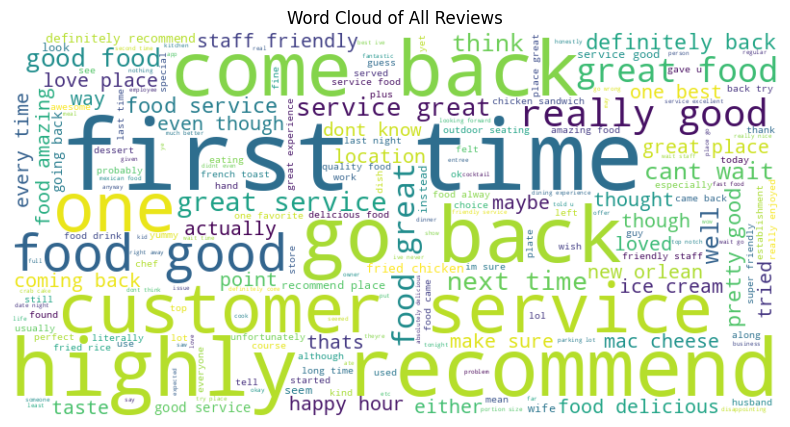

In [ ]:
# Generate a word cloud for the entire dataset
from wordcloud import WordCloud

all_reviews = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of All Reviews')
plt.show()

# Generate separate word clouds for positive and negative sentiments if labeled
if 'Sentiment' in df.columns:
    positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['Review'])
    negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['Review'])

    # Positive reviews word cloud
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation="bilinear")
    plt.axis('off')
    plt.title('Word Cloud of Positive Reviews')
    plt.show()

    # Negative reviews word cloud
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation="bilinear")
    plt.axis('off')
    plt.title('Word Cloud of Negative Reviews')
    plt.show()


### Distribution of Review Lengths

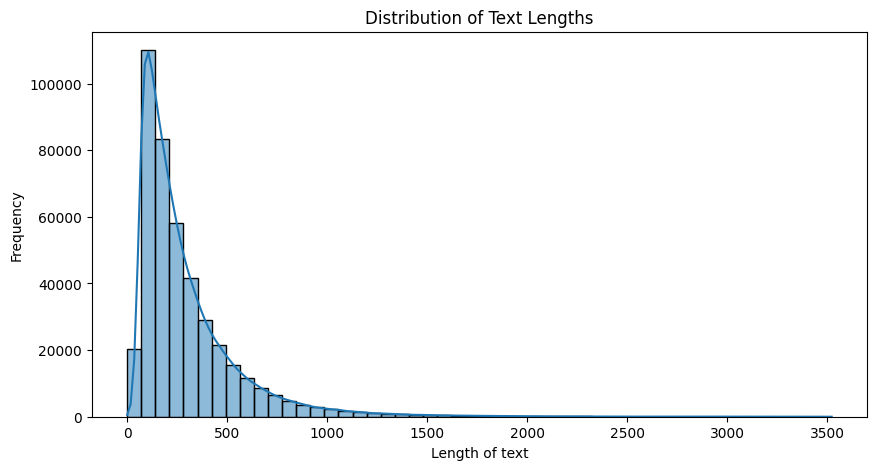

In [ ]:
# Plot the distribution of review lengths
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df['text_Length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of text')
plt.ylabel('Frequency')
plt.show()

The majority of short reviews suggest users prefer brief comments, suggesting businesses should focus on concise messaging. The content may include quick impressions or detailed experiences, offering insights into customer satisfaction. Data analysis should consider skewness and median word count.

#### Distribution of Star Ratings

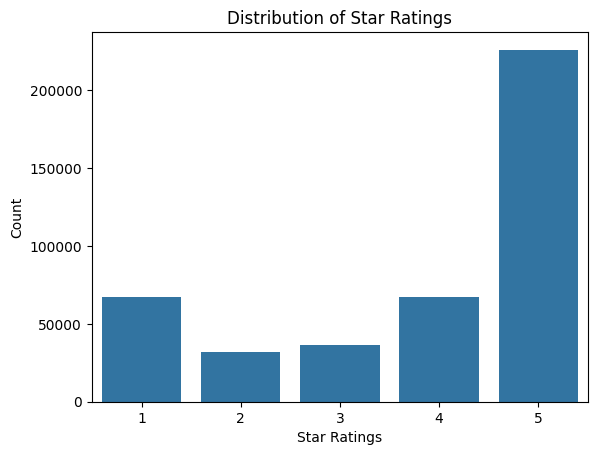

In [ ]:
# Bar plot for the distribution of star ratings
sns.countplot(x='stars', data=df)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Count')
plt.show()


The high number of 5-star reviews on Yelp may make it challenging to distinguish outstanding businesses from average ones due to the skewed nature of ratings. Additionally, Yelp reviewers may be more motivated to leave a review after a positive experience.

#### Distribution of "Cool", "Useful", and "Funny" Votes

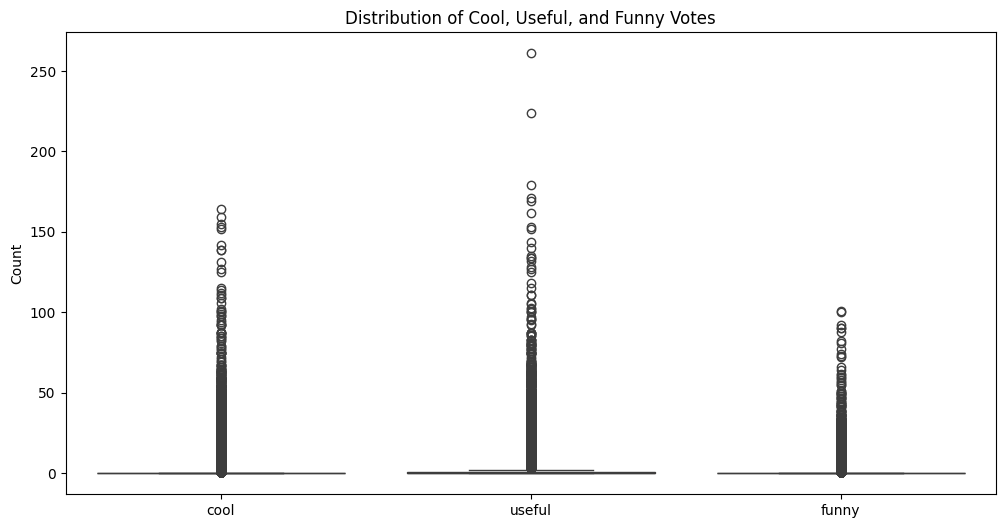

In [ ]:
# Boxplot for cool, useful, and funny votes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['cool', 'useful', 'funny']])
plt.title('Distribution of Cool, Useful, and Funny Votes')
plt.ylabel('Count')
plt.show()

The presence of numerous outliers in all three plots indicates that while most reviews receive a standard level of engagement, some stand out and generate significantly more reactions. This could be due to the content, business popularity, or timing of the review. The variation in IQRs and outliers suggests that some reviews resonate more strongly with the Yelp community, leading to higher interaction levels. Some reviews, particularly in the middle plot, have the potential to go viral on the Yelp platform.

 ### Top Most Frequent Words

Lets dentify the most frequent words that can help understand common themes in the dataset.

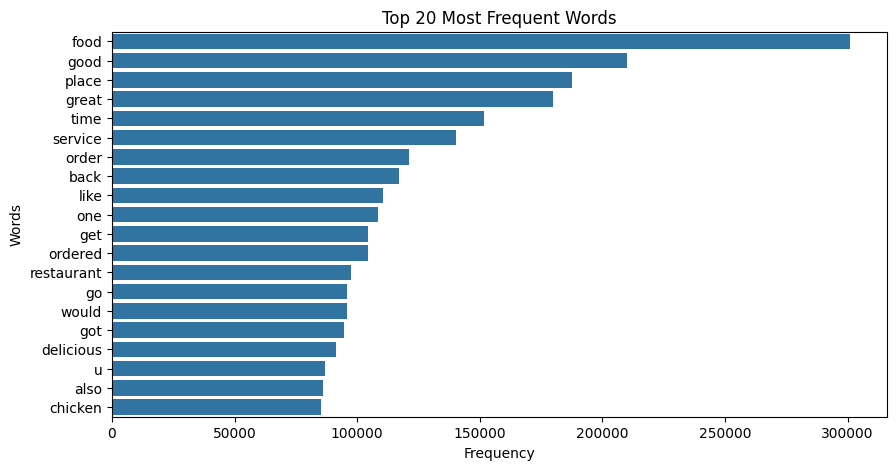

In [ ]:
from collections import Counter

# Tokenize the reviews and remove stopwords
stop_words = set(stopwords.words('english'))
df['Tokens'] = df['text'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words])

# Flatten the list of tokens
all_words = [word for tokens in df['Tokens'] for word in tokens]

# Get the frequency distribution of words
word_freq = Counter(all_words)

# Plot the top N most frequent words
top_n = 20
common_words = word_freq.most_common(top_n)
words, counts = zip(*common_words)

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Word': words, 'Frequency': counts})

plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=df_plot)
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

The majority of reviews express positive sentiments, indicating customer satisfaction at restaurants. Key positive keywords focus on food quality and customer service, indicating their importance. Negative sentiments suggest areas for improvement, such as specific menu items or service speed. The diverse reviews highlight the importance of consistency in quality and service, highlighting the varied experiences of customers.

### Correlation Analysis

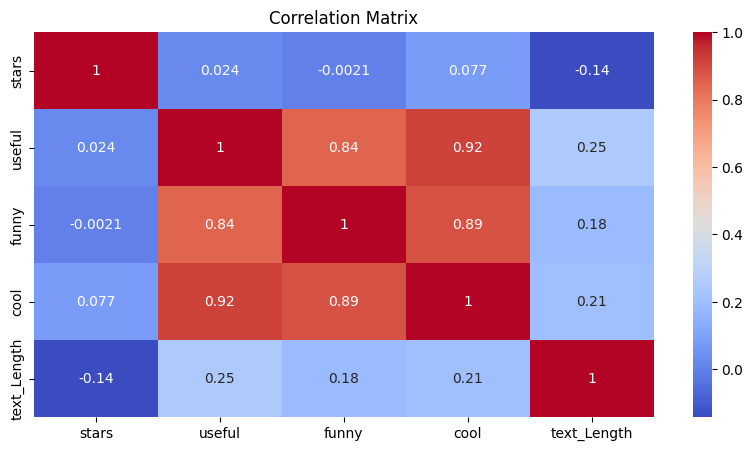

In [ ]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check if there are any numeric columns
if numeric_df.shape[1] > 0:
    plt.figure(figsize=(10, 5))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numeric columns to plot.")



# MODELLING

## Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# The X and Target
X = df['text']
y = df['review_category']

# Label Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_classes = le.classes_
print(target_classes)

# SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Logistic Regression

In [ ]:
# Build and train the model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Report:
               precision    recall  f1-score   support

    negative       0.84      0.89      0.86     19965
     neutral       0.52      0.27      0.35      7217
    positive       0.93      0.97      0.95     58773

    accuracy                           0.89     85955
   macro avg       0.76      0.71      0.72     85955
weighted avg       0.88      0.89      0.88     85955



# Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Build and train the model
# randomf_model = RandomForestClassifier(n_estimators=200, random_state=42)
# randomf_model.fit(X_train_tfidf, y_train)

# # Predict and evaluate
# y_pred = randomf_model.predict(X_test_tfidf)
# print("Random Forest Report:\n", classification_report(y_test, y_pred))




In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build and train the model with reduced parameters
randomf_model = RandomForestClassifier(
    n_estimators=100,     # Reduced number of trees
    max_depth=10,         # Limit the depth of each tree
    min_samples_split=10, # Increase minimum samples to split
    min_samples_leaf=5,   # Increase minimum samples per leaf
    random_state=42
)
randomf_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_rf= randomf_model.predict(X_test_tfidf)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

    negative       0.76      0.85      0.80     19965
     neutral       0.48      0.03      0.05      7217
    positive       0.89      0.96      0.92     58773

    accuracy                           0.86     85955
   macro avg       0.71      0.61      0.59     85955
weighted avg       0.83      0.86      0.82     85955



#### Support Vector Machine (SVM)

In [ ]:
# from sklearn.svm import SVC

# # Build and train the model
# svm_model = SVC(kernel='linear')
# svm_model.fit(X_train_tfidf, y_train)

# # Predict and evaluate
# y_pred = svm_model.predict(X_test_tfidf)
# # print("SVM Report:\n", classification_report(y_test, y_pred))
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report

# Option 2: Reduce dimensionality with TruncatedSVD (like PCA for sparse data)
svd = TruncatedSVD(n_components=100)  # Adjust n_components for speed
X_train_reduced = svd.fit_transform(X_train_tfidf)
X_test_reduced = svd.transform(X_test_tfidf)

# Define the model
svm_model = LinearSVC()

# Train the model on reduced data
svm_model.fit(X_train_reduced, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test_reduced)
print("SVM Report:\n", classification_report(y_test, y_pred))





/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Report:
               precision    recall  f1-score   support

    negative       0.77      0.86      0.81     19965
     neutral       0.48      0.03      0.06      7217
    positive       0.89      0.96      0.93     58773

    accuracy                           0.86     85955
   macro avg       0.71      0.62      0.60     85955
weighted avg       0.83      0.86      0.83     85955



In [ ]:
# Evaluate each model using the correct test labels
lr_metrics = evaluate_model(y_test, y_pred_lr)
rf_metrics = evaluate_model(y_test, y_pred_rf)
svm_metrics = evaluate_model(y_test, y_pred)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [lr_metrics[0], rf_metrics[0], svm_metrics[0]],
    'Precision': [lr_metrics[1], rf_metrics[1], svm_metrics[1]],
    'Recall': [lr_metrics[2], rf_metrics[2], svm_metrics[2]],
    'F1 Score': [lr_metrics[3], rf_metrics[3], svm_metrics[3]]
})

# Rank the models by F1 Score
results['Rank'] = results['F1 Score'].rank(ascending=False)
results.sort_values('Rank', inplace=True)

results_df = pd.DataFrame(results).T

# Display the comparison table
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             0         2              1
Model      Logistic Regression       SVM  Random Forest
Accuracy               0.89128  0.858938       0.720738
Precision             0.875845   0.82955       0.704153
Recall                 0.89128  0.858938       0.720738
F1 Score              0.879758  0.826336       0.632368
Rank                       1.0       2.0            3.0


##CONFUSION MATRIX

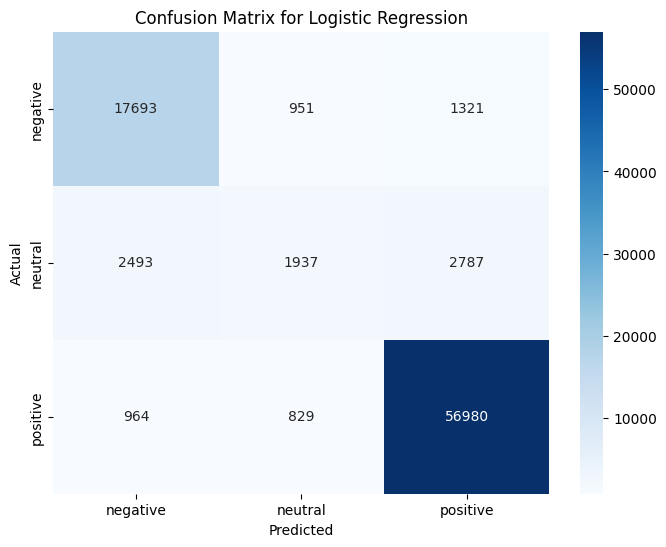

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Split the data (already done in your code)

# Vectorize the text data (already done in your code)

# Build and train the model (already done in your code)

# Predict and evaluate (already done in your code)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()




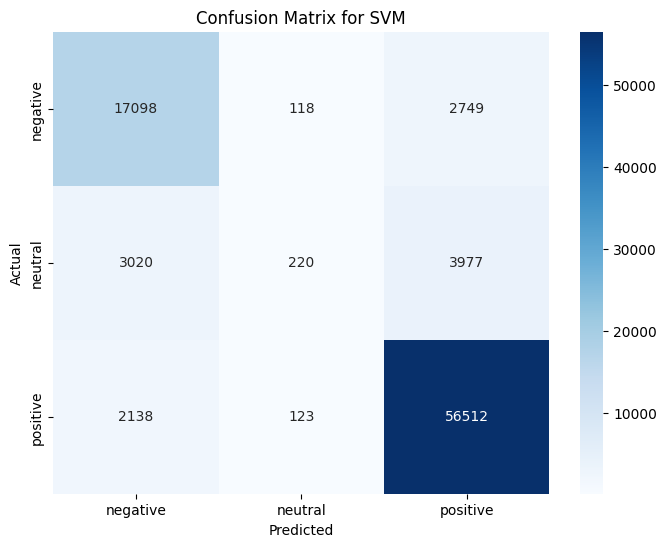

In [ ]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Pipeline for LinearSVC with TruncatedSVD
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('svd', TruncatedSVD()),  # Dimensionality reduction
    ('svm', LinearSVC())  # Linear SVM
])

# Define hyperparameters for Grid Search
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Unigrams or Bigrams
    'svd__n_components': [100, 200],  # Number of components for TruncatedSVD
    'svm__C': [0.1, 1, 10]  # Regularization parameter for LinearSVC
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report for the Best Model:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Best parameters: {'svd__n_components': 200, 'svm__C': 1, 'tfidf__ngram_range': (1, 2)}
Best cross-validation score: 0.8713497922776694
Classification Report for the Best Model:
               precision    recall  f1-score   support

    negative       0.79      0.87      0.83     19965
     neutral       0.56      0.07      0.13      7217
    positive       0.91      0.97      0.94     58773

    accuracy                           0.87     85955
   macro avg       0.75      0.64      0.63     85955
weighted avg       0.85      0.87      0.84     85955

